<a href="https://colab.research.google.com/github/jvataidee/SpatialDataSience/blob/master/StelliteImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Redes de Neurônios Artificiais na análise de imagens de satélite e dados ambientais

Datasets for Machine Learning



[EuroSAT:](http://madm.dfki.de/**downloads**) A land use and land cover classification dataset based on Sentinel-2 satellite images.

In [ ]:
# pacotes para executar operações gráfricas,tabulares,matemáticas
import numpy as np 
import pandas as pd 
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imshow
from pylab import rcParams

# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
!pip install missingpy

In [ ]:
#pacotes para 'imputar' dados
import missingpy
from missingpy import MissForest
from sklearn.impute import SimpleImputer

#Importando dados

In [ ]:
Impute_data=pd.read_excel("Impute.xlsx")

In [ ]:
Impute_data

,Sedimentation,Sedimentation_in_Dead_Storage
0,2557.000,NaN
1,2668.000,NaN
2,NaN,NaN
3,2833.000,1034.000
4,3072.000,1015.000
5,3226.000,1025.000
6,3221.000,1071.000
7,3382.000,1099.000
8,NaN,1196.000
9,NaN,1240.000


In [ ]:
RFORImp=MissForest()
SKLSimple=SimpleImputer(missing_values=np.nan, strategy ='median')

In [ ]:
#executar funções de 'imputar'
Simple_Imp = Impute_data.fillna(method='ffill')

SKL_Imp = pd.DataFrame(SKLSimple.fit_transform(Impute_data))
RFOR_Tab = pd.DataFrame(RFORImp.fit_transform(Impute_data))#Random Forest Imputação e conversão por pandas

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


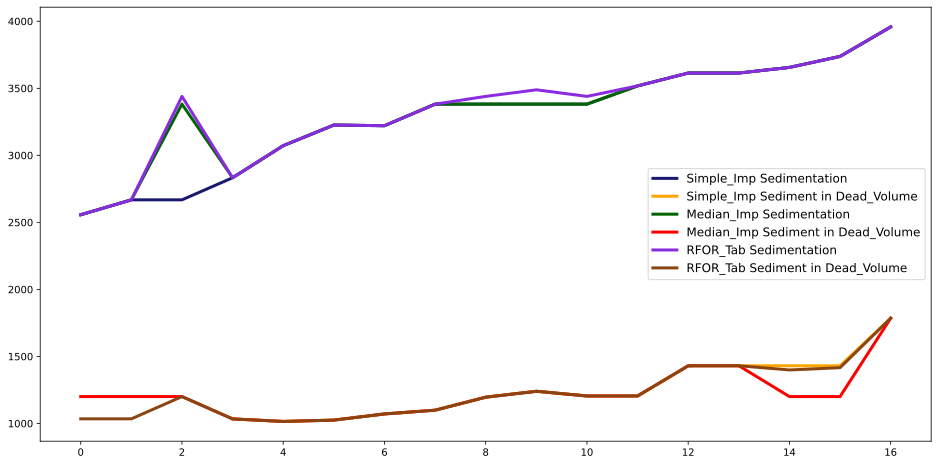

In [ ]:
#Plotando Gráficos
plt.plot(Simple_Imp.index,Simple_Imp ['Sedimentation'], label='Simple_Imp Sedimentation', linewidth=3, color='midnightblue')
plt.plot(Simple_Imp.index,Simple_Imp ['Sedimentation_in_Dead_Storage'], label='Simple_Imp Sediment in Dead_Volume', linewidth=3, color='orange')
plt.plot(SKL_Imp.index,SKL_Imp [0], label='Median_Imp Sedimentation', linewidth=3, color='darkgreen')
plt.plot(SKL_Imp.index,SKL_Imp [1], label ='Median_Imp Sediment in Dead_Volume', linewidth=3, color='red')
plt.plot(RFOR_Tab.index,RFOR_Tab [0], label='RFOR_Tab Sedimentation', linewidth=3, color='blueviolet')
plt.plot(RFOR_Tab.index,RFOR_Tab [1], label ='RFOR_Tab Sediment in Dead_Volume', linewidth=3, color='saddlebrown')

plt.legend(loc='right',fontsize=12)


rcParams['figure.figsize'] = 16,5


plt.show()

In [ ]:
# pacotes escencias por certas funciones como randomizar ou gerar certas representações gráficas 
import os
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# pacotes gerais de ANN
import tensorflow as tf 
from tensorflow import keras
import zipfile

#from tensorflow.keras import datasets, layers, models

# pacotes por certas operções ou câmaras de ANN
from tensorflow.keras import optimizers, losses, utils 
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2

In [ ]:
#Importando conjunto de imagens
path = '/content/EuroSAT.zip'

#Desconpactanddo arquivos
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
 #lugar superior do conjunto de imagens
DATADIR = "/content/2750"

In [ ]:
#DEfinindo as categorias
CATEGORIES = ["River","Forest","AnnualCrop","HerbaceousVegetation","Highway","Industrial","Pasture","PermanentCrop","Residential","SeaLake"]#conjuntos das categórias

In [ ]:
training_data = [] #lista vazia
show = []

In [ ]:
def create_image_set():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)  
        for img in os.listdir(path):
            try: # try-except-pass: medida de segurança contra arquivos quebrados
                img_array=cv2.imread(os.path.join(path,img))
                training_data.append([img_array,class_num])
                show.append(img_array)
            except Exception as e:
                pass
#             plt.imshow(img_array)
#             plt.show()
#             break
#         break

create_image_set()

AxesImage(144,45;892.8x271.8)


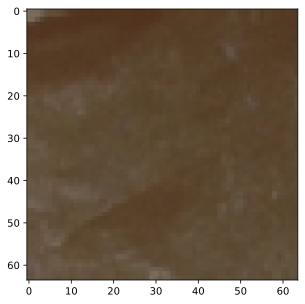

In [ ]:
print(plt.imshow(show[10930]))

In [ ]:
print(training_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
random.shuffle(training_data) #randomizar ordem das imagens

In [ ]:
#crear duas listas. X: Imagens existentes. y: Marcas existentes

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
#crear marcação de One-Hot-Encoding
    
ye=pd.DataFrame(y)
    
New=pd.DataFrame(columns=CATEGORIES)
ye=pd.concat([ye, New],axis=1)

ye.loc[ye['River'].isna()==True, ('River','Forest','AnnualCrop','HerbaceousVegetation','Highway','Industrial','Pasture','PermanentCrop','Residential','SeaLake')] = 0
ye.loc[ye[0] ==0, 'River'] = 1
ye.loc[ye[0] ==1, 'Forest'] = 1
ye.loc[ye[0] ==2, 'AnnualCrop'] = 1
ye.loc[ye[0] ==3, 'HerbaceousVegetation'] = 1
ye.loc[ye[0] ==4, 'Highway'] = 1
ye.loc[ye[0] ==5, 'Industrial'] = 1
ye.loc[ye[0] ==6, 'Pasture'] = 1
ye.loc[ye[0] ==7, 'PermanentCrop'] = 1
ye.loc[ye[0] ==8, 'Residential'] = 1
ye.loc[ye[0] ==9, 'SeaLake'] = 1

ye=ye.drop(ye.columns[0], axis=1)                                    

#mudar pelo tipo de dado float32 que permite numeros do conjunto real
y=ye.astype('float32')      
print(y)



#conversão dos conjunto num numpy.array, necessario para executar a ANN    
X = np.array(X)
y = np.array(y)

       River  Forest  AnnualCrop  ...  PermanentCrop  Residential  SeaLake
0        0.0     0.0         0.0  ...            0.0          0.0      0.0
1        0.0     0.0         0.0  ...            0.0          0.0      0.0
2        0.0     0.0         0.0  ...            1.0          0.0      0.0
3        1.0     0.0         0.0  ...            0.0          0.0      0.0
4        0.0     0.0         0.0  ...            0.0          0.0      0.0
...      ...     ...         ...  ...            ...          ...      ...
26995    0.0     0.0         0.0  ...            0.0          0.0      1.0
26996    0.0     0.0         0.0  ...            0.0          0.0      0.0
26997    0.0     0.0         0.0  ...            0.0          0.0      0.0
26998    0.0     0.0         0.0  ...            0.0          0.0      0.0
26999    0.0     0.0         0.0  ...            0.0          0.0      1.0

[27000 rows x 10 columns]


In [ ]:
print(y.shape,X.shape)
print(np.isnan(y).any()) #controlar, se existem NaN (valores non-númericos) dentro do conjunto

(27000, 10) (27000, 64, 64, 3)
False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=196) #crear um conjuntos para treinar e testar

In [ ]:
#reservar os últimos 2500 imagens por validar durante o treinamento
X_val = X_train[-2500:]
y_val = y_train[-2500:]
X_train = X_train[:-2500]
y_train = y_train[:-2500]

In [ ]:
print (X_train)

[[[[114 111 107]
   [114 111 106]
   [112 106 101]
   ...
   [ 76  67  47]
   [ 73  57  44]
   [ 85  69  57]]

  [[115 111 106]
   [115 112 104]
   [114 107  98]
   ...
   [ 76  67  47]
   [ 71  58  42]
   [ 85  69  56]]

  [[102  98  87]
   [105  99  88]
   [ 88  79  66]
   ...
   [ 75  66  46]
   [ 77  65  47]
   [ 91  79  61]]

  ...

  [[ 98  87  79]
   [ 98  88  78]
   [ 81  72  62]
   ...
   [126 129 150]
   [124 127 148]
   [121 125 144]]

  [[107  97  90]
   [107  97  90]
   [102  94  87]
   ...
   [119 120 140]
   [124 125 145]
   [124 125 145]]

  [[109  99  92]
   [107  99  92]
   [115 106 102]
   ...
   [112 114 132]
   [118 119 139]
   [124 125 145]]]


 [[[123 116 119]
   [125 118 115]
   [ 92  88  70]
   ...
   [111 116 137]
   [112 111 121]
   [117 114 116]]

  [[123 118 117]
   [125 119 114]
   [ 91  87  69]
   ...
   [115 117 135]
   [112 111 120]
   [117 114 116]]

  [[124 118 111]
   [123 119 108]
   [107 102  87]
   ...
   [133 132 141]
   [121 119 125]
   [110 109

##Contruindo o Modelo

In [ ]:
input_shape=[64, 64, 3] #forma dum imagen utilizada: 64pixel*64pixel*3cores

model = Sequential() #modo de escrever a ANN

model.add(Conv2D(28, (3, 3), padding='same',input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(Conv2D(28, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPool2D(2,2)) 

model.add(Conv2D(56, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(Conv2D(56, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPool2D(2,2))

model.add(Conv2D(112, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(Conv2D(112, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPool2D(2,2)) 

model.add(Flatten()) 
model.add(Dense(784)) 
model.add(Activation('relu')) 
model.add(Dropout(0.6)) 
model.add(Dense(10)) 

model.add(Activation('sigmoid')) 
adam = optimizers.Adam(lr=0.001) 
model.compile(optimizer=adam, loss=losses.binary_crossentropy, metrics=['accuracy'])


          
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 28)        784       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 28)        7084      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 28)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 56)        14168     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 56)        0

In [ ]:
#Treinamento
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_val, y_val))

Epoch 1/15
640/640 [==============================] - 509s 795ms/step - loss: 0.2240 - accuracy: 0.5263 - val_loss: 0.1728 - val_accuracy: 0.6268
Epoch 2/15
640/640 [==============================] - 501s 783ms/step - loss: 0.1282 - accuracy: 0.7331 - val_loss: 0.1429 - val_accuracy: 0.7132
Epoch 3/15
640/640 [==============================] - 507s 792ms/step - loss: 0.1002 - accuracy: 0.8028 - val_loss: 0.0929 - val_accuracy: 0.8036
Epoch 4/15
640/640 [==============================] - 515s 805ms/step - loss: 0.0812 - accuracy: 0.8472 - val_loss: 0.0850 - val_accuracy: 0.8440
Epoch 5/15
640/640 [==============================] - 540s 844ms/step - loss: 0.0721 - accuracy: 0.8632 - val_loss: 0.0976 - val_accuracy: 0.8212
Epoch 6/15
640/640 [==============================] - 536s 837ms/step - loss: 0.0640 - accuracy: 0.8809 - val_loss: 0.0899 - val_accuracy: 0.8228
Epoch 7/15
640/640 [==============================] - 535s 836ms/step - loss: 0.0546 - accuracy: 0.9007 - val_loss: 0.0766 -

Text(0.5, 1.0, 'Loss Curves')

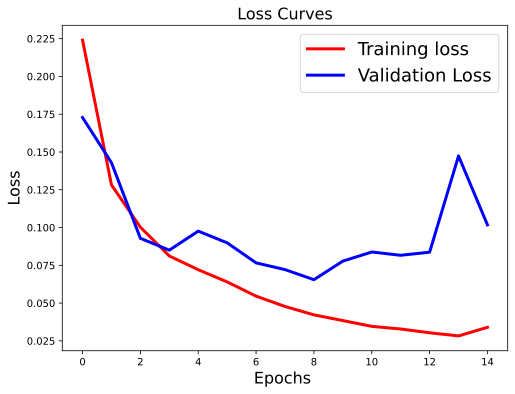

In [ ]:
# Curvas do Loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5, 1.0, 'Accuracy Curves')

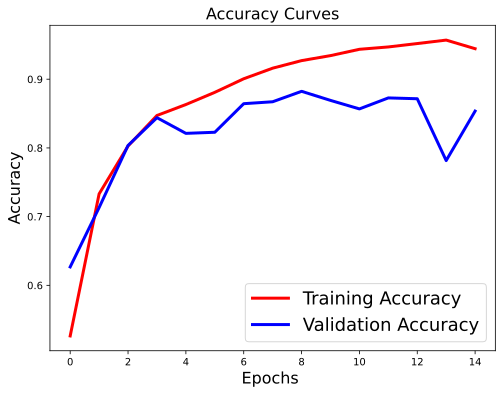

In [ ]:
# Curvas da precisão
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
# Predição por X_test
preds2 = model.predict(X_test, verbose=1)

127/127 [==============================] - 26s 202ms/step


In [ ]:
#a matrix de confusão, mostrando o rácio de sucesso da ANN
print(y_test.shape)

y_test= np.array([np.argmax(y) for y in y_test])
y_predict=np.array([ np.argmax(p) for p in preds2])

(4050, 10)


In [ ]:
print(y_test.shape)
print(y_predict.shape)

(4050,)
(4050,)


Text(0.5, 24.0, 'Predicted label')

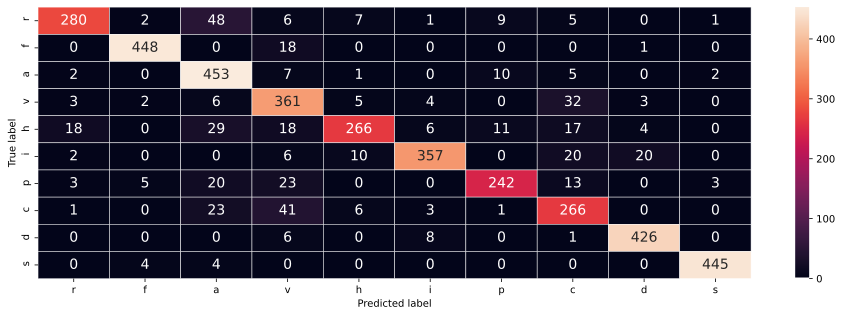

In [ ]:
confusion=confusion_matrix(y_test, y_predict)
sns.heatmap(confusion, annot=True, annot_kws={"size": 14}, fmt='g', linewidths=.5, 
            yticklabels='r''f''a''v''h''i''p''c''d''s',xticklabels='r''f''a''v''h''i''p''c''d''s')

plt.ylabel('True label')
plt.xlabel('Predicted label')